In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.fftpack as spfft
import cvxpy as cvx

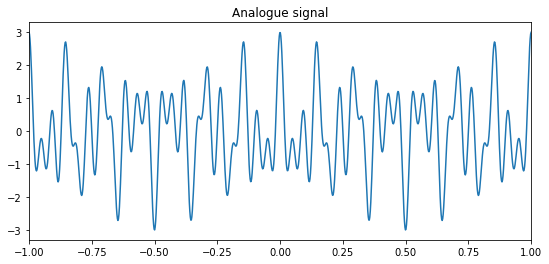

In [2]:
# number of plotting intervals
ppoint = 1000
t = np.linspace(-1, 1, ppoint)

# frequencies present in signal (Hz)
freq = [7, 13, 21]

y = np.cos(2 * np.pi * np.outer(freq, t)).sum(axis = 0)
fig, ax = plt.subplots(1, figsize = (9, 4))
ax.plot(t, y)
ax.set_xlim(t.min(), t.max())
ax.set_title('Analogue signal')
plt.show()

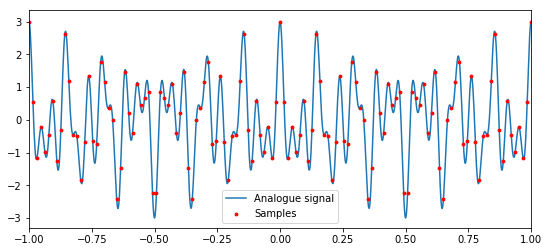

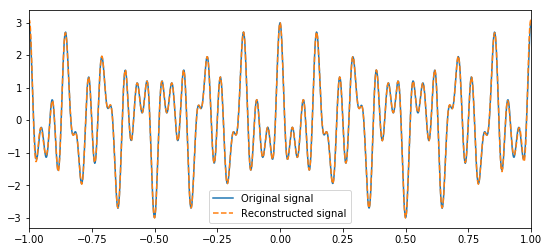

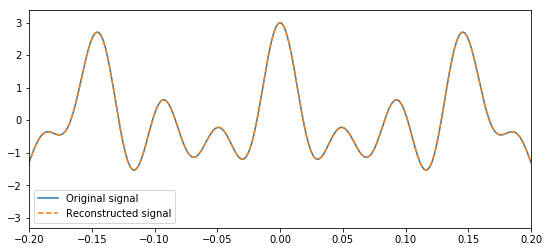

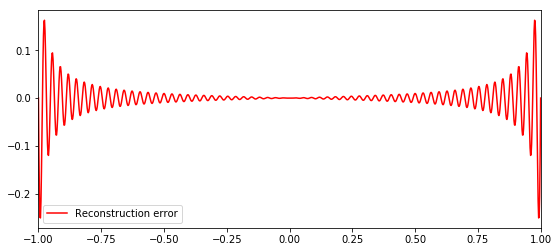

In [3]:
# shannon sampling and reconstruction

fs = 3 * np.max(freq) # sampling frequency
ts = np.arange(-1, 1 + 1 / fs, 1 / fs)
ys = np.cos(2 * np.pi * np.outer(freq, ts)).sum(axis = 0)

fig, ax = plt.subplots(1, figsize = (9, 4))
ax.plot(t, y, zorder = 1)
ax.scatter(ts, ys, color = 'r', s = 8, zorder = 2)
ax.set_xlim(t.min(), t.max())
ax.legend(labels = ['Analogue signal', 'Samples'])

# sinc interpolation
num_cof = len(ts)
recon = 0
for k in range(num_cof):
    recon += ys[k] * np.sinc(k - int(num_cof / 2) - fs * t)
    
fig, ax = plt.subplots(1, figsize = (9, 4))
ax.plot(t, y, zorder = 1)
ax.plot(t, recon, '--', zorder = 2)
ax.set_xlim(t.min(), t.max())
ax.legend(labels = ['Original signal', 'Reconstructed signal'])

fig, ax = plt.subplots(1, figsize = (9, 4))
ax.plot(t, y, zorder = 1)
ax.plot(t, recon, '--', zorder = 2)
ax.set_xlim(t.min() / 5, t.max() / 5)
ax.legend(labels = ['Original signal', 'Reconstructed signal'])

er = y - recon
fig, ax = plt.subplots(1, figsize = (9, 4))
ax.plot(t, er, 'r')
ax.set_xlim(t.min(), t.max())
ax.legend(labels = ['Reconstruction error'])

plt.show()

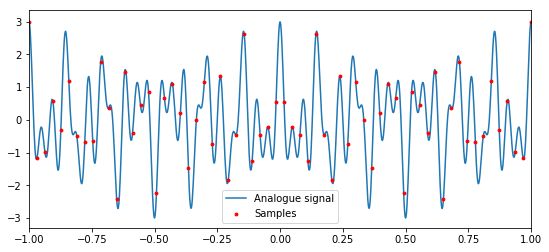

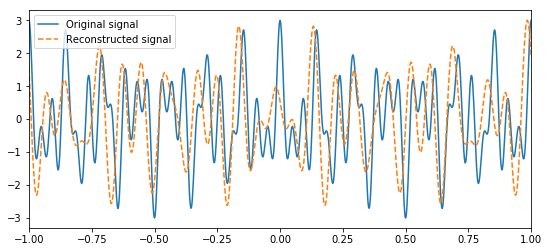

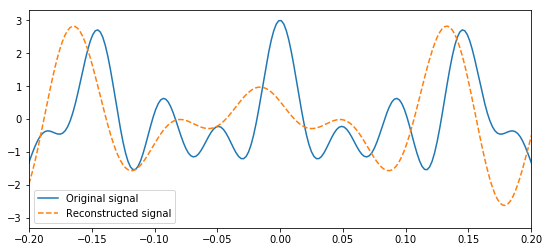

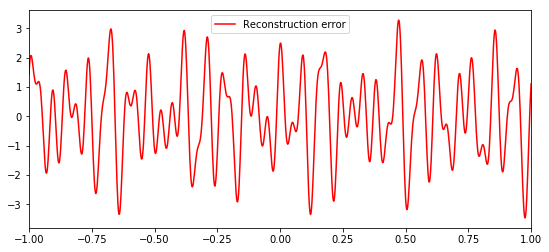

In [4]:
# under sampling

fs_u = 0.5 * fs # sampling frequency
ts_u = np.arange(-1, 1 + 1 / fs_u, 1 / fs_u)
ys_u = np.cos(2 * np.pi * np.outer(freq, ts_u)).sum(axis = 0)

fig, ax = plt.subplots(1, figsize = (9, 4))
ax.plot(t, y, zorder = 1)
ax.scatter(ts_u, ys_u, color = 'r', s = 8, zorder = 2)
ax.set_xlim(t.min(), t.max())
ax.legend(labels = ['Analogue signal', 'Samples'])

# sinc interpolation
num_cof = len(ts_u)
recon = 0
for k in range(num_cof):
    recon += ys_u[k] * np.sinc(k - int(num_cof / 2) - fs_u * t)
    
fig, ax = plt.subplots(1, figsize = (9, 4))
ax.plot(t, y, zorder = 1)
ax.plot(t, recon, '--', zorder = 2)
ax.set_xlim(t.min(), t.max())
ax.legend(labels = ['Original signal', 'Reconstructed signal'])

fig, ax = plt.subplots(1, figsize = (9, 4))
ax.plot(t, y, zorder = 1)
ax.plot(t, recon, '--', zorder = 2)
ax.set_xlim(t.min() / 5, t.max() / 5)
ax.legend(labels = ['Original signal', 'Reconstructed signal'])

er = y - recon
fig, ax = plt.subplots(1, figsize = (9, 4))
ax.plot(t, er, 'r')
ax.set_xlim(t.min(), t.max())
ax.legend(labels = ['Reconstruction error'])

plt.show()

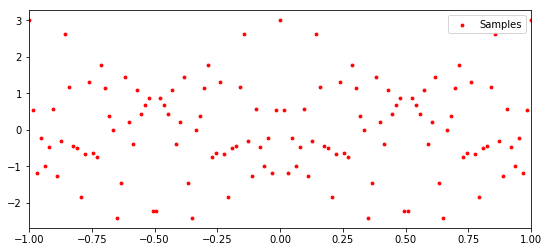

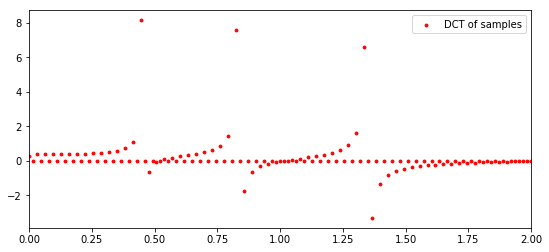

In [5]:
# compressive sensing - pseudo sparseness of samples in DCT basis indicates compressibility

fig, ax = plt.subplots(1, figsize = (9, 4))
ax.scatter(ts, ys, color = 'r', s  = 8, zorder = 2)
ax.set_xlim(t.min(), t.max())
ax.legend(labels = ['Samples'])

ts_dct = np.linspace(0, 2, len(ys))
ys_dct = spfft.dct(ys, norm = 'ortho')

fig, ax = plt.subplots(1, figsize = (9, 4))
ax.scatter(ts_dct, ys_dct, color = 'r', s  = 8, zorder = 2)
ax.set_xlim(0, t.max() - t.min())
ax.legend(labels = ['DCT of samples'])

plt.show()


ECOS 2.0.4 - (C) embotech GmbH, Zurich Switzerland, 2012-15. Web: www.embotech.com/ECOS

It     pcost       dcost      gap   pres   dres    k/t    mu     step   sigma     IR    |   BT
 0  +0.000e+00  -0.000e+00  +6e+02  9e-01  1e-02  1e+00  2e+00    ---    ---    1  1  - |  -  - 
 1  +1.824e+01  +1.833e+01  +2e+02  6e-01  4e-03  4e-01  8e-01  0.7258  9e-02   0  0  0 |  0  0
 2  +2.839e+01  +2.844e+01  +9e+01  3e-01  2e-03  2e-01  4e-01  0.6030  4e-02   1  0  1 |  0  0
 3  +3.425e+01  +3.427e+01  +4e+01  1e-01  7e-04  9e-02  2e-01  0.5888  5e-02   1  0  1 |  0  0
 4  +3.696e+01  +3.698e+01  +2e+01  4e-02  2e-04  4e-02  6e-02  0.7123  1e-01   1  1  1 |  0  0
 5  +3.845e+01  +3.846e+01  +4e+00  1e-02  7e-05  1e-02  2e-02  0.8000  1e-01   1  1  1 |  0  0
 6  +3.913e+01  +3.913e+01  +1e+00  4e-03  2e-05  4e-03  5e-03  0.7096  3e-02   1  1  1 |  0  0
 7  +3.922e+01  +3.922e+01  +7e-01  2e-03  1e-05  2e-03  3e-03  0.6456  3e-01   1  1  1 |  0  0
 8  +3.932e+01  +3.932e+01  +2e-01  6e-04  4e-

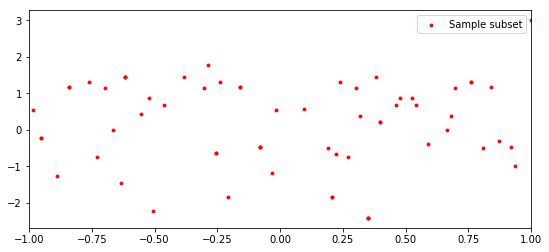

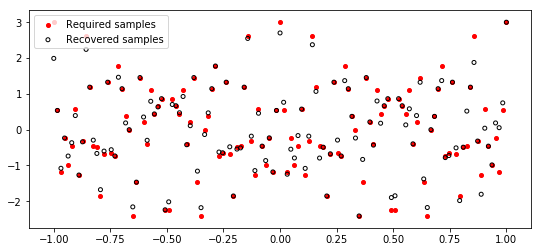

In [6]:
# select a random subset of samples, half the amount required for faithful reconstruction

idx = np.random.choice(len(ts), int(len(ts) / 2), replace = 'False')
ts_sub = ts[idx]
ys_sub = ys[idx]

fig, ax = plt.subplots(1, figsize = (9, 4))
ax.scatter(ts_sub, ys_sub, color = 'r', s  = 8, zorder = 2)
ax.set_xlim(t.min(), t.max())
ax.legend(labels = ['Sample subset'])

# construct sensing matrix
A = spfft.dct(np.identity(len(ts)), norm = 'ortho', axis = 0)[idx]

# solve l1 norm minimising linear program to recover full set of samples
ts_sol = cvx.Variable(len(ts))
objective = cvx.Minimize(cvx.norm(ts_sol, 1))
constraints = [A*ts_sol == ys_sub]
prob = cvx.Problem(objective, constraints)
result = prob.solve(verbose = True)

# move solution from frequency domain to time domain
cof = np.squeeze(np.array(ts_sol.value))
ys_sol = spfft.dct(cof, norm = 'ortho')

fig, ax = plt.subplots(1, figsize = (9, 4))
ax.scatter(ts, ys, color = 'r', s = 16, zorder = 1)
ax.scatter(ts, ys_sol, color = 'k', s = 16, facecolors = 'none', zorder = 2)
ax.legend(labels = ['Required samples', 'Recovered samples'])

plt.show()

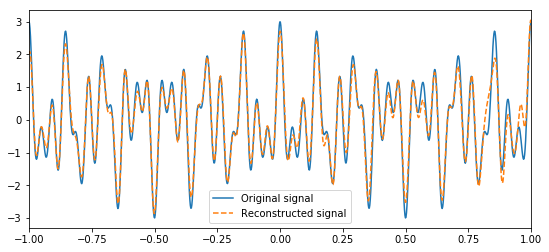

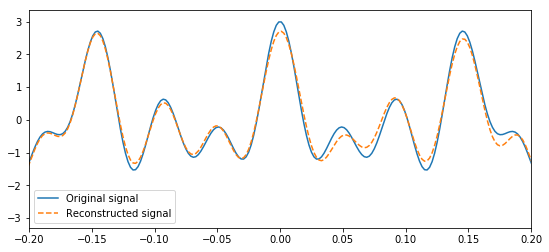

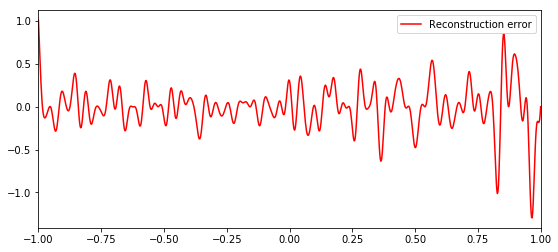

In [7]:
# use recovered samples for sinc interpolation to recover analogue signal
num_cof = len(ts)
recon = 0
for k in range(num_cof):
    recon += ys_sol[k] * np.sinc(k - int(num_cof / 2) - fs * t)
    
fig, ax = plt.subplots(1, figsize = (9, 4))
ax.plot(t, y, zorder = 1)
ax.plot(t, recon, '--', zorder = 2)
ax.set_xlim(t.min(), t.max())
ax.legend(labels = ['Original signal', 'Reconstructed signal'])

fig, ax = plt.subplots(1, figsize = (9, 4))
ax.plot(t, y, zorder = 1)
ax.plot(t, recon, '--', zorder = 2)
ax.set_xlim(t.min() / 5, t.max() / 5)
ax.legend(labels = ['Original signal', 'Reconstructed signal'])

er = y - recon
fig, ax = plt.subplots(1, figsize = (9, 4))
ax.plot(t, er, 'r')
ax.set_xlim(t.min(), t.max())
ax.legend(labels = ['Reconstruction error'])

plt.show()

The above result is obtained by starting with half the samples required for faithful reconstruction, using these to attempt to recover the samples obtained by sampling at the frequency required for faithful reconstruction (using l1 norm minimisation linear program with sensing matrix constraint), and finally using sinc interpolation with the recovered samples to recover the original analogue signal. Compare this to the result obtained by simply sampling and reconstructing at half the frequency required for faithful reconstruction. Clearly the compressed sensing has yieleded a remarkably improved result.